In [53]:
import yfinance as yf
import pandas_datareader.data as web
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
es_futures = '^SPX'
start_date = datetime(2010,1,1)
end_date = datetime(2011,1,1)

In [19]:
es_df = web.DataReader(es_futures, 'stooq',start=start_date,end=end_date)
es_df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2022-11-21,3956.23,3962.00,3933.34,3949.94,1.638796e+09
2022-11-18,3966.39,3979.89,3935.98,3965.34,2.233623e+09
2022-11-17,3919.26,3954.33,3906.54,3946.56,2.196018e+09
2022-11-16,3976.82,3983.09,3954.34,3958.79,2.405875e+09
2022-11-15,4006.41,4028.84,3953.17,3991.73,2.796621e+09


In [40]:
eth_df =pd.read_csv("./data/eth.csv", index_col='Date', parse_dates=True)
eth_df = eth_df.iloc[::-1]
eth_df.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2017-11-29,476.675484,524.356285,427.233001,427.233001,1.497273e+09,4.593803e+10
2017-11-30,431.505862,465.240587,403.099585,447.889008,1.803252e+09,4.209423e+10
2017-12-01,446.687467,473.461463,428.973482,465.688648,1.071947e+09,4.307045e+10
2017-12-02,466.701873,477.328305,457.965814,465.195692,8.105988e+08,4.501313e+10
2017-12-03,465.176425,482.885385,453.236437,466.483835,6.057337e+08,4.525139e+10


In [129]:
# 200 Day MA
eth_df['200 Day MA'] = eth_df['Close'].rolling(window=200).mean()

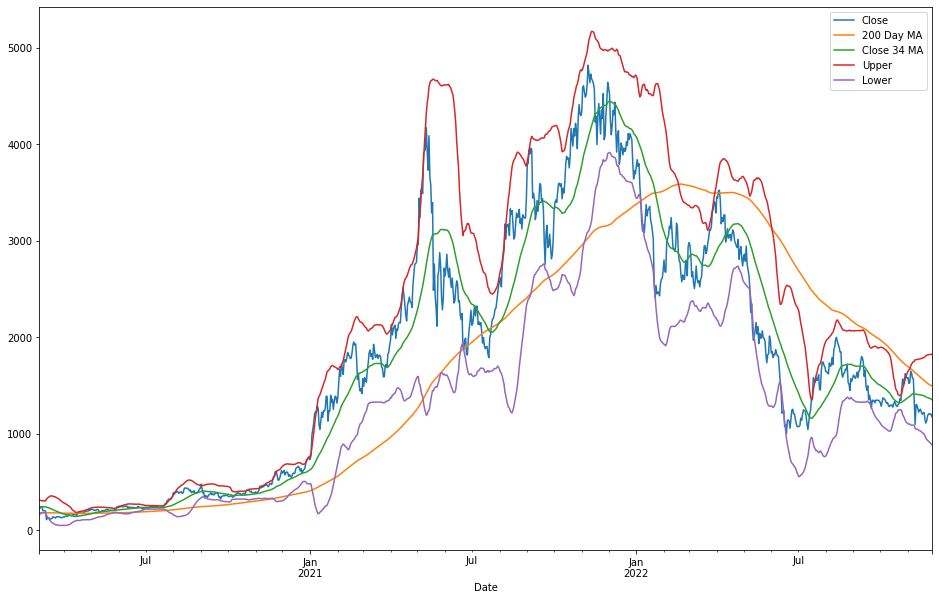

In [130]:
# Bollinger Bands 34 days (vs 20) with 2.5 sigma (vs 2)

# Close Price 34 Day MA
eth_df['Close 34 MA'] = eth_df['Close'].rolling(window=34).mean()
# Upper Band = 34 Day MA + 2 * Std Dev(34 Days)
eth_df['Upper'] = eth_df['Close 34 MA'] + 2.5 * (eth_df['Close'].rolling(34).std())
# Lower Band = 34 Day MA - 2 * Std Dev (20 Days)
eth_df['Lower'] = eth_df['Close 34 MA'] - 2.5 * (eth_df['Close'].rolling(34).std())
# Plot
eth_df[['Close','200 Day MA','Close 34 MA','Upper','Lower']].tail(1000).plot(figsize=(16,10));

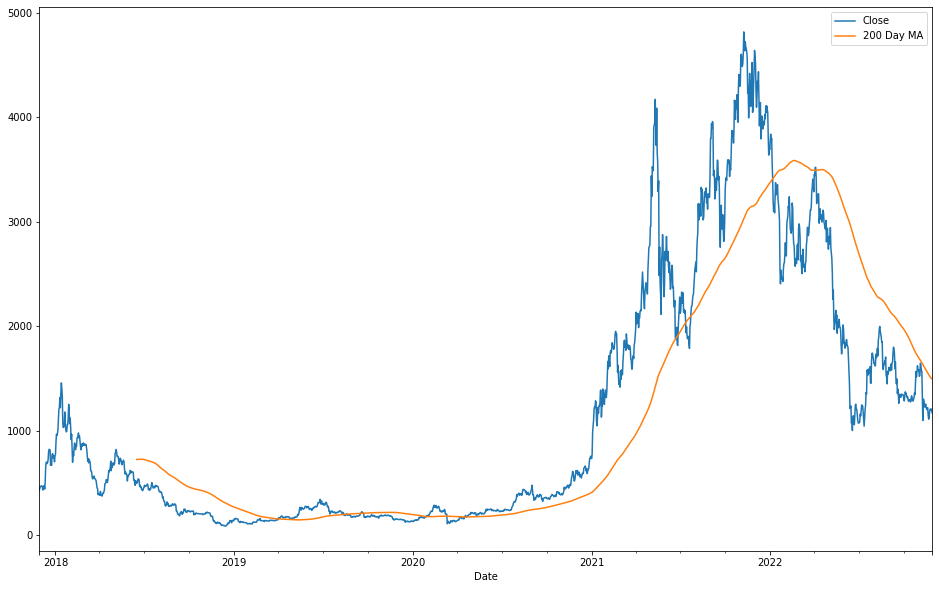

In [43]:
eth_df[['Close','200 Day MA']].plot(figsize=(16,10));

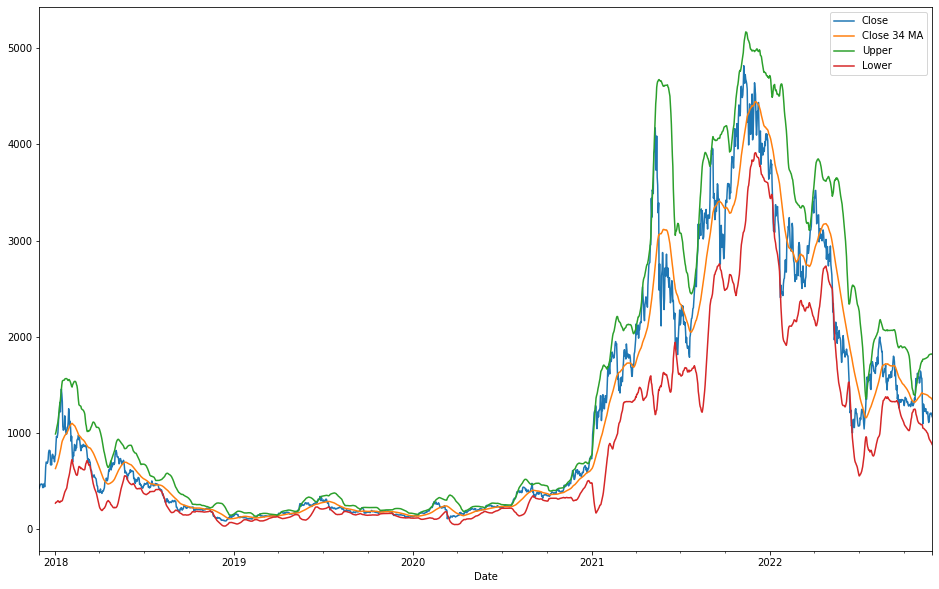

In [131]:
eth_df[['Close','Close 34 MA','Upper','Lower']].plot(figsize=(16,10));

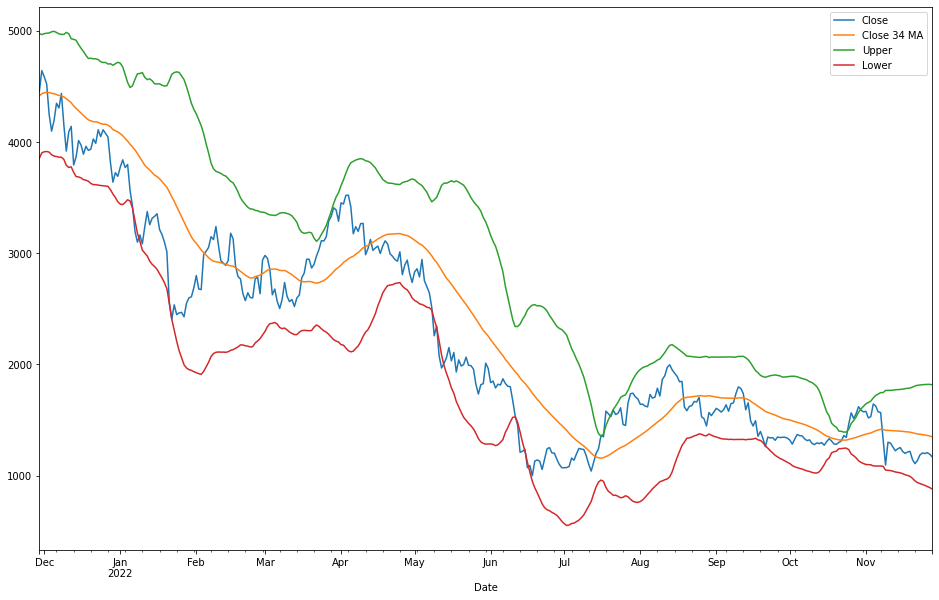

In [132]:
eth_df[['Close','Close 34 MA','Upper','Lower']].tail(365).plot(figsize=(16,10));

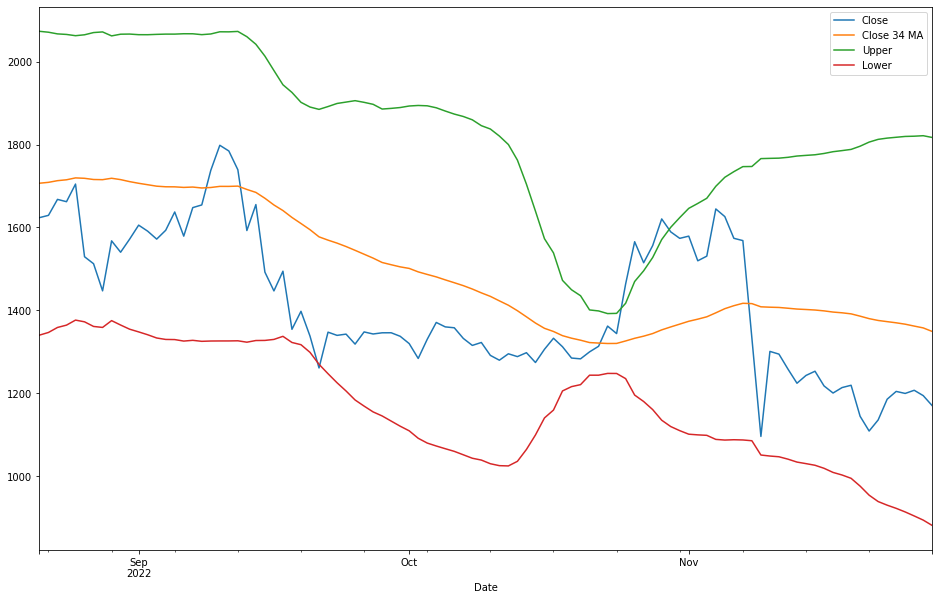

In [133]:
eth_df[['Close','Close 34 MA','Upper','Lower']].tail(100).plot(figsize=(16,10));

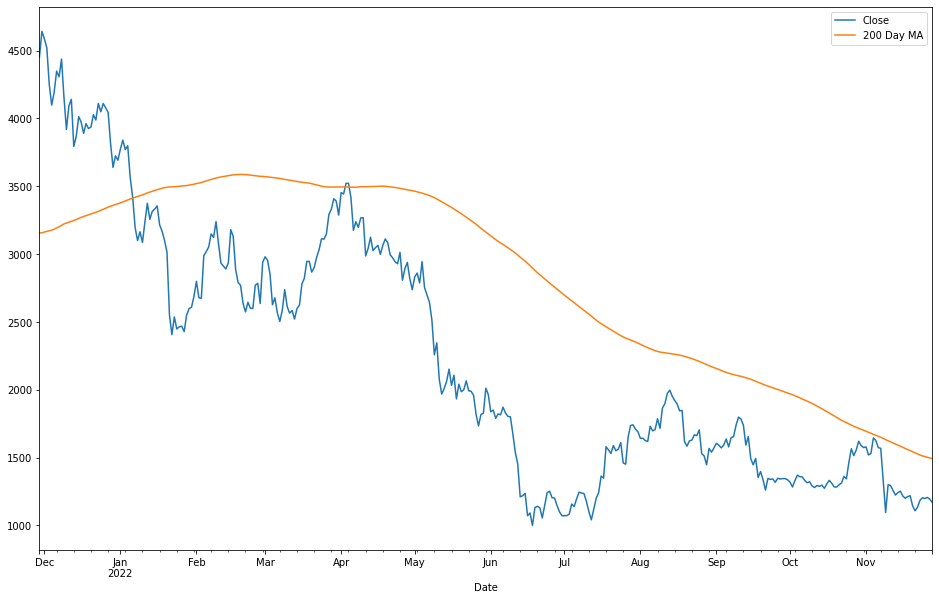

In [49]:
eth_df[['Close','200 Day MA']].tail(365).plot(figsize=(16,10));

In [50]:
### Moving Average (MA) Crossover Trading Strategy

* Open long position when cross over
* Close position when cross below

In [99]:
# 200 Day MA
eth_df['200 Day MA'] = eth_df['Close'].rolling(window=200).mean()
eth_df['100 Day MA'] = eth_df['Close'].rolling(window=100).mean()
eth_df['80 Day MA'] = eth_df['Close'].rolling(window=80).mean()
eth_df['50 Day MA'] = eth_df['Close'].rolling(window=80).mean()

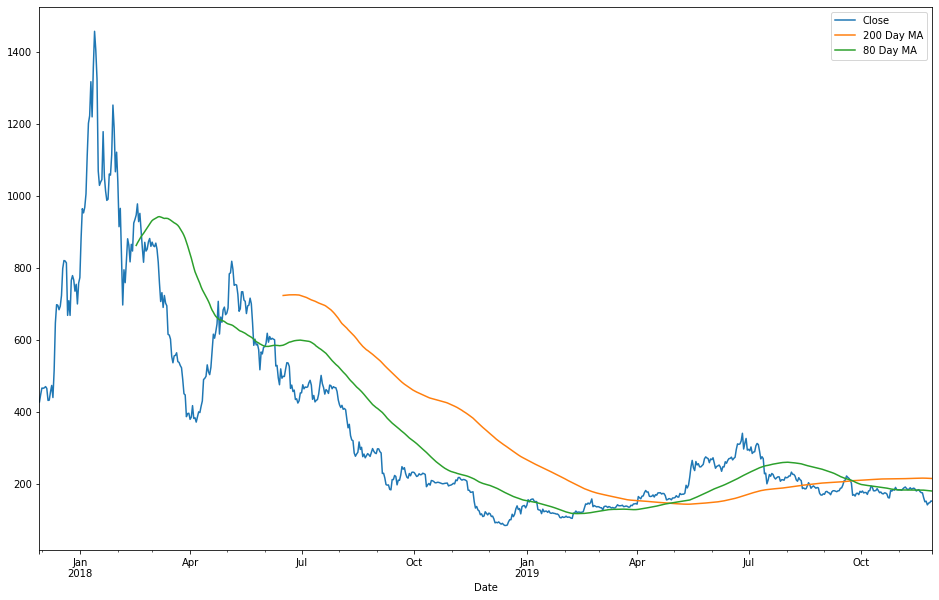

In [75]:
eth_df[['Close','200 Day MA','80 Day MA']].head(730).plot(figsize=(16,10));

In [76]:
eth_df['200 Day EMA'] = eth_df['Close'].ewm(span=200).mean()
eth_df['100 Day EMA'] = eth_df['Close'].ewm(span=100).mean()
eth_df['80 Day EMA'] = eth_df['Close'].ewm(span=80).mean()
eth_df['50 Day EMA'] = eth_df['Close'].ewm(span=80).mean()

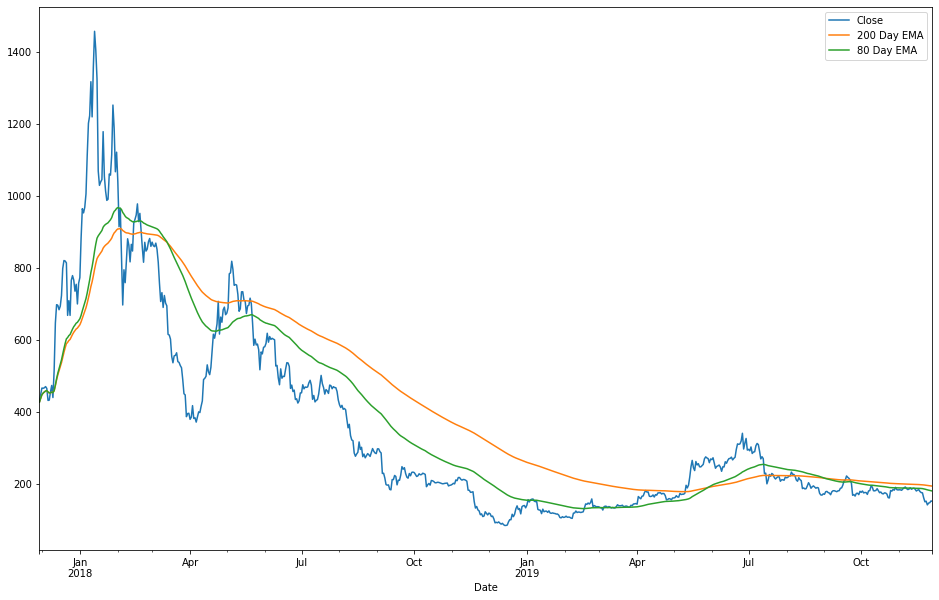

In [77]:
eth_df[['Close','200 Day EMA','80 Day EMA']].head(730).plot(figsize=(16,10));

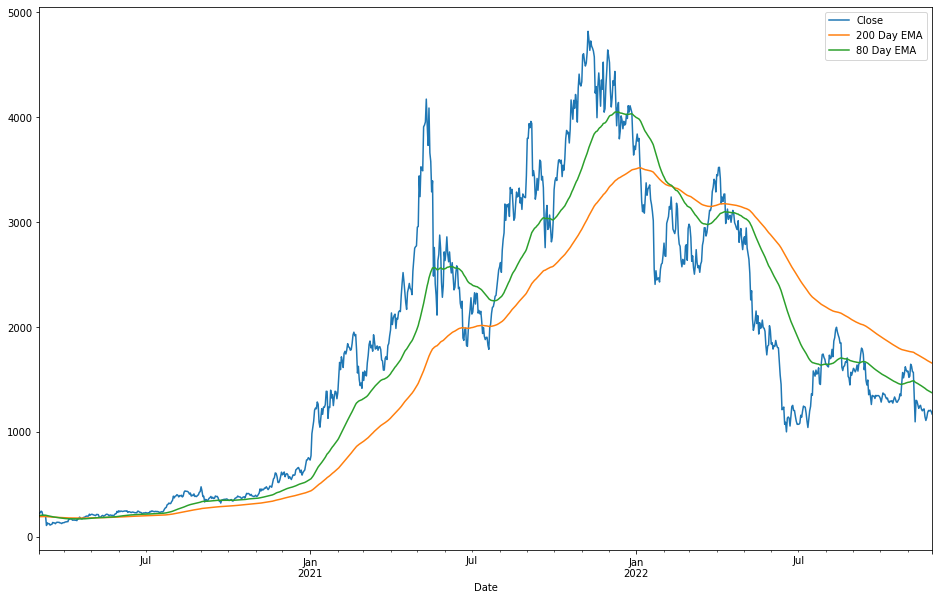

In [79]:
eth_df[['Close','200 Day EMA','80 Day EMA']].tail(1000).plot(figsize=(16,10));

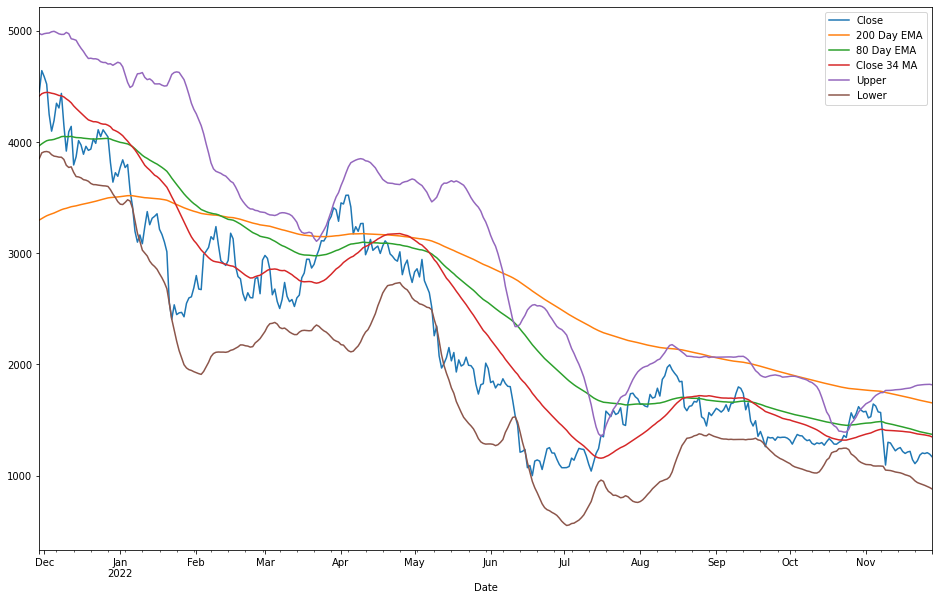

In [134]:
eth_df[['Close','200 Day EMA','80 Day EMA','Close 34 MA','Upper','Lower']].tail(365).plot(figsize=(16,10));

In [84]:
eth_df.tail()

,Open,High,Low,Close,Volume,Market Cap,200 Day MA,Close 30 MA,Upper,Lower,100 Day MA,80 Day MA,50 Day MA,200 Day EMA,100 Day EMA,80 Day EMA,50 Day EMA
Date,,,,,,,,,,,,,,,,,
2022-11-24,1186.067000,1214.771533,1181.902200,1204.057000,2.079242e+10,1.468174e+11,1512.621951,1269.733273,1744.750673,794.715873,1434.887006,1389.254020,1389.254020,1673.340978,1429.045753,1390.745576,1390.745576
2022-11-25,1204.774000,1204.774000,1175.986487,1199.168447,1.546590e+10,1.456402e+11,1507.327775,1248.383980,1720.261481,776.506480,1428.432066,1384.506620,1384.506620,1668.622843,1424.493727,1386.015276,1386.015276
2022-11-26,1198.443900,1225.973536,1197.908439,1206.782540,1.476010e+10,1.487204e+11,1501.632627,1230.035082,1700.719734,759.350430,1422.018574,1378.993336,1378.993336,1664.027417,1420.182615,1381.589777,1381.589777
2022-11-27,1205.801239,1221.936299,1193.848214,1193.848214,1.173905e+10,1.486537e+11,1497.215386,1211.316528,1676.337306,746.295749,1417.784151,1373.237470,1373.237470,1659.349017,1415.700745,1376.954182,1376.954182
2022-11-28,1194.281155,1199.517200,1155.365000,1169.484301,1.555358e+10,1.435306e+11,1493.223032,1203.152437,1653.851232,752.453642,1413.637744,1366.131851,1366.131851,1654.474741,1410.825172,1371.831469,1371.831469


In [97]:
eth_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2017-11-29 to 2022-11-28
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Open         1826 non-null   float64
 1   High         1826 non-null   float64
 2   Low          1826 non-null   float64
 3   Close        1826 non-null   float64
 4   Volume       1826 non-null   float64
 5   Market Cap   1826 non-null   float64
 6   200 Day MA   1627 non-null   float64
 7   Close 30 MA  1807 non-null   float64
 8   Upper        1797 non-null   float64
 9   Lower        1797 non-null   float64
 10  100 Day MA   1727 non-null   float64
 11  80 Day MA    1747 non-null   float64
 12  50 Day MA    1747 non-null   float64
 13  200 Day EMA  1826 non-null   float64
 14  100 Day EMA  1826 non-null   float64
 15  80 Day EMA   1826 non-null   float64
 16  50 Day EMA   1826 non-null   float64
dtypes: float64(17)
memory usage: 256.8 KB


In [120]:
capital = 10000000
asset = "eth"
start_date = datetime(2019,1,1)
end_date = datetime(2021,11,1)
short_period = 80
long_period = 200

In [135]:
class Portfolio:
    def __init__(self, data, capital, stock, start, end, short_period, long_period):
        self.data = data
        self.is_in_position = False
        self.short_period = short_period
        self.long_period = long_period
        self.capital = capital
        self.equity = [capital]
        self.stock = stock
        self.start = start
        self.end = end
        
    def backtest(self):
        """
        if strategy is not paused
        if we are above or below 200 MA
        - below defensively bearish
        - above defenisively bullish
        - defenisvely implies mean reversion
        
        
        
        """
        for index, row in self.data.iterrows():
            price = row['Close']
            long_ema= row['200 Day EMA']
            short_ema = row['80 Day EMA']
            bb_upper = row['Upper']
            bb_lower = row['Lower']
            bb_mid = row['Close 34 MA']     
            
            
            
            
            # check if index is within trading period...
            if index >= self.start and index <= self.end:            
                # todo add capital
                if self.is_in_position == False and self.capital > 0:
                    if price > long_ema and short_ema > long_ema:
                        self.equity = self.capital * price
                        self.is_in_position = True
                        print(f"entering position equity: {self.equity} capital: {self.capital}")
                elif self.is_in_position == True:
                    if price < short_ema and short_ema < long_ema:
                        self.capital = self.equity / price
                        self.is_in_position = False
                        print(f"exiting position equity: {self.equity} capital: {self.capital}")
            elif index > self.end and self.is_in_position == True:
                self.capital = self.equity / price
                self.equity = 0
                self.is_in_position = False
                print(f"exiting position due to time equity: {self.equity} capital: {self.capital}")
                
        

In [136]:
#data, capital, stock, start, end, short_period, long_period
p = Portfolio(eth_df, capital,asset,start_date, end_date, short_period, long_period)

In [137]:
p.backtest()

entering position equity: 2699043023.77 capital: 10000000
exiting position equity: 2699043023.77 capital: 15166633.484217115
entering position equity: 3966755225.3124537 capital: 15166633.484217115
exiting position equity: 3966755225.3124537 capital: 29365160.56984885
entering position equity: 6216868429.284337 capital: 29365160.56984885
exiting position due to time equity: 0 capital: 1353558.5453112626


In [138]:
p.capital

1353558.5453112626